In [2]:
import pandas as pd
import glob as gl
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import numpy as np

In [3]:
data = pd.concat([pd.read_csv(f, sep=';') for f in gl.glob('data/*.csv')], ignore_index=True)

In [7]:
data.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0.0,0,0,0,0.0,0.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1.0,1,0,0,1.0,0.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1.0,0,0,0,1.0,0.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1.0,0,0,0,0.0,1.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2.0,1,0,0,1.0,1.0,NaN


In [4]:
#Definindo dados do país
brasil = data[data.estado.isna()]
brasil.set_index('data', inplace=True)

#Definindo dados do estado
rs = data[(data.estado == 'RS') & data.municipio.isna()]
rs['data'] = pd.to_datetime(rs['data'])
rs.set_index('data', inplace=True)
rs.sort_index(inplace=True)

#Definindo dados do município
caxias_do_sul = data[(data.municipio == 'Caxias do Sul')]
caxias_do_sul['data'] = pd.to_datetime(caxias_do_sul['data'])
caxias_do_sul.set_index('data', inplace=True)
caxias_do_sul.sort_index(inplace=True)

C:\Users\Matheus\AppData\Local\Temp\ipykernel_30828\4252149958.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rs['data'] = pd.to_datetime(rs['data'])
C:\Users\Matheus\AppData\Local\Temp\ipykernel_30828\4252149958.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rs.sort_index(inplace=True)
C:\Users\Matheus\AppData\Local\Temp\ipykernel_30828\4252149958.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

#Atividade 2 - Gráfico de Barras

In [22]:
rs.columns

Index(['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'codRegiaoSaude',
       'nomeRegiaoSaude', 'semanaEpi', 'populacaoTCU2019', 'casosAcumulado',
       'casosNovos', 'obitosAcumulado', 'obitosNovos', 'Recuperadosnovos',
       'emAcompanhamentoNovos', 'interior/metropolitana'],
      dtype='object')

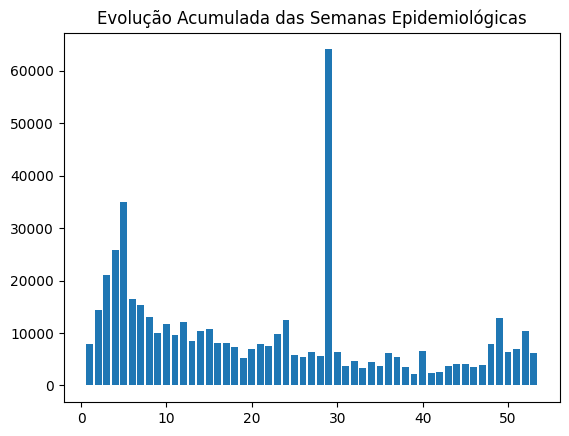

In [24]:
x = rs['semanaEpi']
y = rs['casosNovos']

plt.bar(x,y)
plt.title('Evolução de Casos Novos das Semanas Epidemiológicas')
plt.show()



In [8]:
uf_3 = data[(data.estado.isin(['RS','SP','MG'])) & data.municipio.isna()]
uf_3['data'] = pd.to_datetime(uf_3['data'])
uf_3.set_index('data', inplace=True)
uf_3.sort_index(inplace=True)
uf_3.fillna(0,inplace=True)

C:\Users\Matheus\AppData\Local\Temp\ipykernel_33372\2419373128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uf_3['data'] = pd.to_datetime(uf_3['data'])
C:\Users\Matheus\AppData\Local\Temp\ipykernel_33372\2419373128.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uf_3.sort_index(inplace=True)
C:\Users\Matheus\AppData\Local\Temp\ipykernel_33372\2419373128.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [5]:
uf_3

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
data,,,,,,,,,,,,,,,,
2020-02-25,Sudeste,MG,0,31,0.0,0.0,0,9,21168791.0,0.0,0,0,0,0.0,0.0,0.0
2020-02-25,Sul,RS,0,43,0.0,0.0,0,9,11377239.0,0.0,0,0,0,0.0,0.0,0.0
2020-02-25,Sudeste,SP,0,35,0.0,0.0,0,9,45919049.0,0.0,0,0,0,0.0,0.0,0.0
2020-02-26,Sudeste,SP,0,35,0.0,0.0,0,9,45919049.0,1.0,1,0,0,0.0,0.0,0.0
2020-02-26,Sul,RS,0,43,0.0,0.0,0,9,11377239.0,0.0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-24,Sudeste,SP,0,35,350000.0,0.0,0,34,0.0,265.0,0,0,0,0.0,0.0,0.0
2024-08-24,Sul,RS,0,43,0.0,0.0,0,34,11377239.0,3139568.0,155,43001,2,0.0,0.0,0.0
2024-08-24,Sudeste,MG,0,31,310000.0,0.0,0,34,0.0,0.0,0,0,0,0.0,0.0,0.0


In [6]:
print(len(uf_3[uf_3['estado'] == 'RS']['casosAcumulado'].tolist()))

3255


In [7]:
print(len(uf_3[uf_3['estado'] == 'SP']['casosAcumulado'].tolist()))

3255


In [8]:
print(len(uf_3[uf_3['estado'] == 'MG']['casosAcumulado'].tolist()))

3255


In [6]:
caxias_do_sul.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
data,,,,,,,,,,,,,,,,
2020-03-27,Sul,RS,Caxias do Sul,43,430510.0,43023.0,REGIAO 23,13,510906.0,0.0,0,0,0,NaN,NaN,0.0
2020-03-28,Sul,RS,Caxias do Sul,43,430510.0,43023.0,REGIAO 23,13,510906.0,6.0,6,0,0,NaN,NaN,0.0
2020-03-29,Sul,RS,Caxias do Sul,43,430510.0,43023.0,REGIAO 23,14,510906.0,6.0,0,0,0,NaN,NaN,0.0
2020-03-30,Sul,RS,Caxias do Sul,43,430510.0,43023.0,REGIAO 23,14,510906.0,6.0,0,0,0,NaN,NaN,0.0
2020-03-31,Sul,RS,Caxias do Sul,43,430510.0,43023.0,REGIAO 23,14,510906.0,13.0,7,0,0,NaN,NaN,0.0


In [10]:
coodernadas_estados = {
    'RS': {'latitude': -30.0346, 'longitude': -51.2177},
    'SP': {'latitude': -23.5505, 'longitude': -46.6333},
    'MG': {'latitude': -19.9167, 'longitude': -43.9345}
}

In [11]:
def obter_coordenadas(estado):
    return coodernadas_estados.get(estado, {'latitude': None, 'longitude': None})

# Criando novas colunas de latitude e longitude
uf_3['latitude'] = uf_3['estado'].apply(lambda x: obter_coordenadas(x)['latitude'])
uf_3['longitude'] = uf_3['estado'].apply(lambda x: obter_coordenadas(x)['longitude'])

uf_3.head()

C:\Users\Matheus\AppData\Local\Temp\ipykernel_33372\2446605502.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uf_3['latitude'] = uf_3['estado'].apply(lambda x: obter_coordenadas(x)['latitude'])
C:\Users\Matheus\AppData\Local\Temp\ipykernel_33372\2446605502.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uf_3['longitude'] = uf_3['estado'].apply(lambda x: obter_coordenadas(x)['longitude'])


,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,latitude,longitude
data,,,,,,,,,,,,,,,,,,
2020-02-25,Sudeste,MG,0,31,0.0,0.0,0,9,21168791.0,0.0,0,0,0,0.0,0.0,0.0,-19.9167,-43.9345
2020-02-25,Sul,RS,0,43,0.0,0.0,0,9,11377239.0,0.0,0,0,0,0.0,0.0,0.0,-30.0346,-51.2177
2020-02-25,Sudeste,SP,0,35,0.0,0.0,0,9,45919049.0,0.0,0,0,0,0.0,0.0,0.0,-23.5505,-46.6333
2020-02-26,Sudeste,SP,0,35,0.0,0.0,0,9,45919049.0,1.0,1,0,0,0.0,0.0,0.0,-23.5505,-46.6333
2020-02-26,Sul,RS,0,43,0.0,0.0,0,9,11377239.0,0.0,0,0,0,0.0,0.0,0.0,-30.0346,-51.2177


In [4]:
#Dados de todos os estados
estados = data[data.estado.notna()]
estados = estados[estados.municipio.isna()]
estados.set_index('data', inplace=True)

estados.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
data,,,,,,,,,,,,,,,,
2020-02-25,Norte,RO,NaN,11,NaN,NaN,NaN,9,1777225.0,0.0,0,0,0,NaN,NaN,NaN
2020-02-26,Norte,RO,NaN,11,NaN,NaN,NaN,9,1777225.0,0.0,0,0,0,NaN,NaN,NaN
2020-02-27,Norte,RO,NaN,11,NaN,NaN,NaN,9,1777225.0,0.0,0,0,0,NaN,NaN,NaN
2020-02-28,Norte,RO,NaN,11,NaN,NaN,NaN,9,1777225.0,0.0,0,0,0,NaN,NaN,NaN
2020-02-29,Norte,RO,NaN,11,NaN,NaN,NaN,9,1777225.0,0.0,0,0,0,NaN,NaN,NaN


In [6]:
estados.describe()

,coduf,codmun,codRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
count,78213.000000,33852.000000,0.0,78213.000000,4.436100e+04,7.821300e+04,78213.000000,78213.000000,78213.000000,0.0,0.0,0.0
mean,29.434007,298571.428571,NaN,26.205861,7.783227e+06,5.322734e+05,498.010932,11088.229719,9.128201,NaN,NaN,NaN
std,11.986258,108422.549781,NaN,14.522138,9.078493e+06,1.027309e+06,1836.071154,24856.161775,40.789684,NaN,NaN,NaN
min,11.000000,110000.000000,NaN,1.000000,6.057610e+05,0.000000e+00,-34512.000000,0.000000,-438.000000,NaN,NaN,NaN
25%,21.000000,230000.000000,NaN,14.000000,2.778986e+06,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,27.000000,280000.000000,NaN,26.000000,4.018650e+06,8.125300e+04,0.000000,1760.000000,0.000000,NaN,NaN,NaN
75%,41.000000,350000.000000,NaN,38.000000,9.557071e+06,5.892370e+05,212.000000,11096.000000,2.000000,NaN,NaN,NaN
max,53.000000,520000.000000,NaN,53.000000,4.591905e+07,6.878809e+06,105700.000000,183771.000000,1389.000000,NaN,NaN,NaN


In [8]:
#Dados das regioes Norte, Nordeste e Sudeste
regioes = data[data.regiao.isin(['Norte','Nordeste','Sudeste'])]
regioes.set_index('data', inplace=True)

regioes.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
data,,,,,,,,,,,,,,,,
2020-02-25,Norte,RO,NaN,11,NaN,NaN,NaN,9,1777225.0,0.0,0,0,0,NaN,NaN,NaN
2020-02-26,Norte,RO,NaN,11,NaN,NaN,NaN,9,1777225.0,0.0,0,0,0,NaN,NaN,NaN
2020-02-27,Norte,RO,NaN,11,NaN,NaN,NaN,9,1777225.0,0.0,0,0,0,NaN,NaN,NaN
2020-02-28,Norte,RO,NaN,11,NaN,NaN,NaN,9,1777225.0,0.0,0,0,0,NaN,NaN,NaN
2020-02-29,Norte,RO,NaN,11,NaN,NaN,NaN,9,1777225.0,0.0,0,0,0,NaN,NaN,NaN


In [13]:
import altair as alt
import streamlit as st

# Exemplo de dados (você deve substituir por seus dados reais)
data = {
    'semana_epidemiologica': ['2023-W01', '2023-W02', '2023-W03', '2023-W04', '2023-W05'],
    'casos_novos': [100, 150, 200, 130, 170],
}

df = pd.DataFrame(data)

# Criando o gráfico de área
area_chart = alt.Chart(df).mark_area(opacity=0.6).encode(
    x=alt.X('semana_epidemiologica:T', title='Semana Epidemiológica'),
    y=alt.Y('casos_novos:Q', title='Casos Novos de COVID-19'),
    tooltip=['semana_epidemiologica', 'casos_novos']
).properties(
    title='Evolução dos Casos Novos de COVID-19 por Semana Epidemiológica'
)

area_chart.save('area_chart.html')

st.altair_chart(area_chart, use_container_width=True)

2024-09-01 18:38:45.951 
  command:

    streamlit run C:\Users\Matheus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [14]:
df_rs_filtered = rs[['casosNovos','obitosNovos']]

df_rs_filtered = df_rs_filtered.reset_index()
df_rs_filtered = df_rs_filtered.rename(columns={'index': 'casosNovos'})

df_rs_filtered = df_rs_filtered.set_index('casosNovos', drop=True).drop(columns=['data'])

df_rs_filtered

,obitosNovos
casosNovos,
0,0
0,0
0,0
0,0
0,0
...,...
0,0
0,0
0,0
